In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

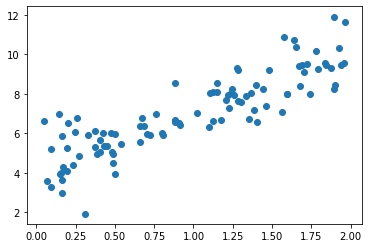

In [5]:
plt.scatter(X,y)

In [6]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.17376223],
       [2.91306053]])

In [8]:
X_new =np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17376223],
       [9.9998833 ]])

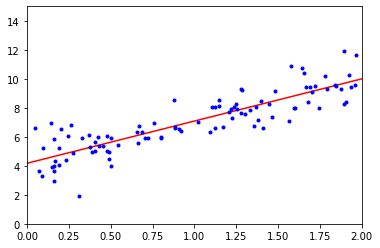

In [9]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X,y)

lin_reg.predict(X_new)

array([[4.17376223],
       [9.9998833 ]])

In [13]:
lin_reg.intercept_,lin_reg.coef_

(array([4.17376223]), array([[2.91306053]]))

In [14]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.17376223],
       [2.91306053]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.17376223],
       [2.91306053]])

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

In [17]:
theta = np.random.randn(2,1)

In [18]:
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta*gradients

In [19]:
theta

array([[4.17376223],
       [2.91306053]])

In [20]:
X_new_b.dot(theta)

array([[4.17376223],
       [9.9998833 ]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

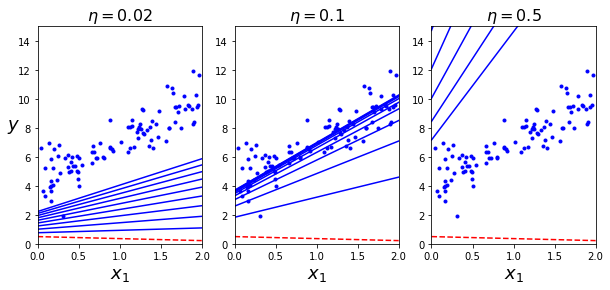

In [23]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [32]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [36]:
n_epochs = 50
t0,t1 = 5,50

In [37]:
def learning_schedule(t):
    return t0/(t+t1)

In [38]:
theta = np.random.randn(2,1)

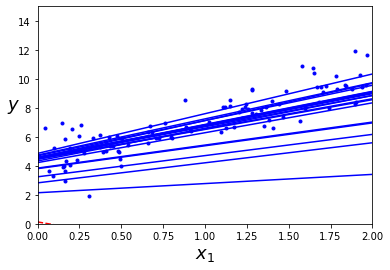

In [39]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i <20:
            y_predict=X_new_b.dot(theta)
            style = 'b-' if i>0 else'r--'
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                               
plt.show()   

In [40]:
theta

array([[4.13490252],
       [2.94538431]])